In [1]:
import numpy as np

### Image Transformation
```    1. Resizing
2. Flipping
3. Cropping
4. Rotating
5. Image Translation/Shifting
6. Image Shearing
7. Affine Transformation```

In [2]:
import cv2

img_cv2 = cv2.imread("../datasets/images/sachin.jpg")

cv2.imshow("Original Image", img_cv2)
cv2.waitKey(0)
cv2.destroyAllWindows()    # Closes all OpenCV windows.

In [3]:
from PIL import Image

img_pil = Image.open("../datasets/images/sachin.jpg")

img_pil.show()

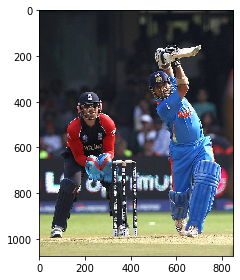

In [4]:
from skimage.transform import resize
import matplotlib.pyplot as plt

from skimage import io

img_ski = io.imread("../datasets/images/sachin.jpg")
io.imshow(img_ski);

### <b>```1. Image Resizing```</b>
    - Using OpenCv
    - Using PIL
    - Using Scikit-image

#### Resizing Using OpenCV

In [5]:
# help(cv2.resize)

In [6]:
## 1.
# (width,height)

resize_image = cv2.resize(img_cv2,(900,500))  

In [7]:
cv2.imshow("Resized Image", resize_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
## 2.

'''
cv2.resize() is used to resize the image.
img: The original image.
None: Specifies that the output size will be calculated based on scaling factors fx and fy.
fx=0.5: The scaling factor along the x-axis (width).
fy=0.5: The scaling factor along the y-axis (height).
This reduces the image size to 50% of its original dimensions.

'''

rescaled_img = cv2.resize(img_cv2,None,fx=0.5,fy=0.5)
cv2.imshow("Rescaled Image", rescaled_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
## 3. 

'''
cv2.resize() resizes the image.
fx=0.75: Scales the width (x-axis) to 75% of the original size.
fy=0.80: Scales the height (y-axis) to 80% of the original size.
None: Indicates that the output size will be determined based on the scaling factors.
'''

rescaled_img = cv2.resize(img_cv2,None,fx=0.75,fy=0.80)
cv2.imshow("Rescaled Image", rescaled_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Resizing Using PIL

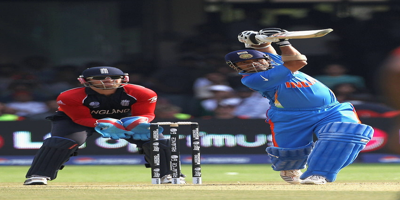

In [10]:
# (width,height)

img_pil.resize((400,200))

#### Resizing Using skimage (scikit-image)

In [11]:
'''
img_ski: The input image, which is likely a NumPy array.
(200, 900): The new dimensions of the image (height: 300 pixels, width: 500 pixels).
'''

resize_ski = resize(img_ski,(300,500));

img_ski.shape,resize_ski.shape

((1075, 850, 3), (300, 500, 3))

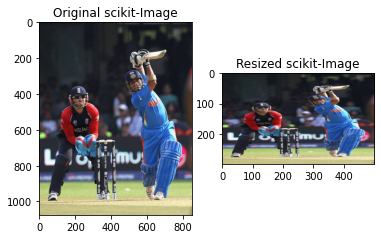

In [12]:
plt.subplot(1,2,1)
plt.title("Original scikit-Image")
plt.imshow(img_ski);
plt.subplot(1,2,2)
plt.title("Resized scikit-Image")
plt.imshow(resize_ski);

### <b>```2. Image Flipping```</b>
    - Using OpenCv

In [13]:
img_rgb = cv2.cvtColor(img_cv2,cv2.COLOR_BGR2RGB)

In [14]:
# Horizontal flip
'''
Purpose: Flips the image along the horizontal axis (top-to-bottom flip).
Parameter:

0: Indicates flipping along the horizontal axis.
'''
flp_hor = cv2.flip(img_rgb,0)

In [15]:
# vertical flip
'''
Purpose: Flips the image along the vertical axis (left-to-right flip).
Parameter:

1: Indicates flipping along the vertical axis.
'''
flp_ver = cv2.flip(img_rgb,1)

In [16]:
# diagonal flip
'''
Purpose: Flips the image along both axes (horizontal and vertical).
Parameter:

-1: Indicates flipping along both axes simultaneously.
'''
flp_dia = cv2.flip(img_rgb,-1)

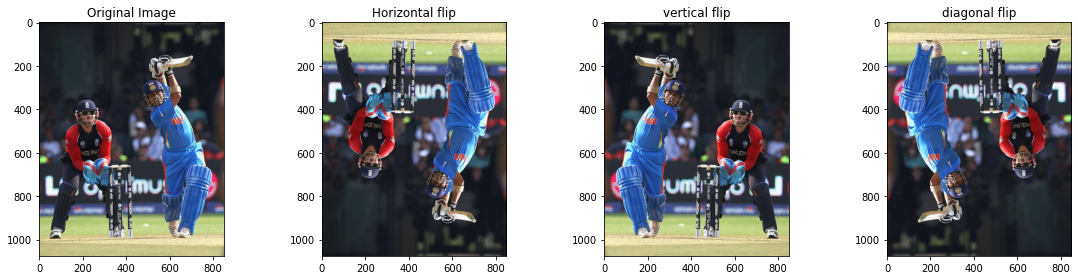

In [17]:
# Set the figure size (width, height) in inches
plt.figure(figsize = (16, 4))  # Adjust the size as needed

plt.subplot(1,4,1)
plt.title("Original Image")
plt.imshow(img_rgb);

plt.subplot(1,4,2)
plt.title("Horizontal flip")
plt.imshow(flp_hor);

plt.subplot(1,4,3)
plt.title("vertical flip")
plt.imshow(flp_ver);

plt.subplot(1,4,4)
plt.title("diagonal flip")
plt.imshow(flp_dia);

plt.tight_layout()  # Adjust spacing between subplots

### <b>```3. Image Cropping```</b>
    - Using OpenCv and Plt

In [18]:
height,width, _ = img_rgb.shape

height,width,_

(1075, 850, 3)

In [19]:
start_row = int(height*0.25)
start_col = int(width*0.25)
end_row = int(height*0.85)
end_col = int(width*0.85)

In [20]:
cropped_img_proper = img_rgb[start_row:end_row,start_col:end_col]

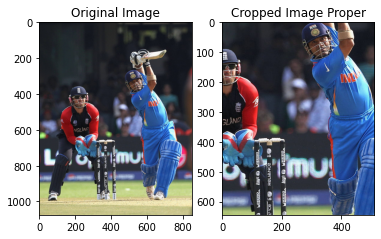

In [21]:
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_rgb);
plt.subplot(1,2,2)
plt.title("Cropped Image Proper")
plt.imshow(cropped_img_proper);

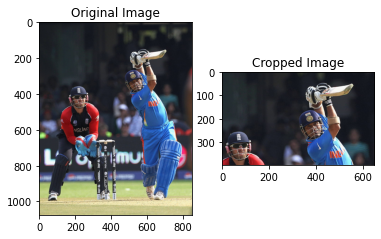

In [22]:
## manually 
croppedImage = img_rgb[100:500,150:800]   # height,width

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_rgb);
plt.subplot(1,2,2)
plt.title("Cropped Image")
plt.imshow(croppedImage);

### <b>```4. Image Rotating```</b>
    - Using OpenCv
    - Using PIL

#### Using OpenCV

In [23]:
img_rot_180 = cv2.rotate(img_cv2,cv2.ROTATE_180)

cv2.imshow('Rotated Image in 180',img_rot_180)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
img_rot_90C = cv2.rotate(img_cv2,cv2.ROTATE_90_CLOCKWISE)

cv2.imshow('Rotated Image in 90 Clockwise',img_rot_90C)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### - Finding Center value and then rotate

In [25]:
height,width,_ = img_cv2.shape

height,width

(1075, 850)

In [26]:
# get the center value 
'''
img.shape[0]: Height of the image (number of rows of pixels).
img.shape[1]: Width of the image (number of columns of pixels).
img.shape[2]: Number of channels (for color images, this is typically 3 for RGB, for grayscale it's 1).

'''
center = img_cv2.shape[1]//2,img_cv2.shape[0]//2
center

(425, 537)

In [27]:
# create the rotation matrix (center,angle,scale)

angle = 60
rotation_matrix = cv2.getRotationMatrix2D(center,angle,1.0)

# create the rotated image 

rotated_image = cv2.warpAffine(img_cv2,rotation_matrix,(width,height))

cv2.imshow("Rotated Image By center", rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

####  - Manually without finding center and take any point as center

In [28]:
# create the rotation matrix (center,angle,scale)
angle = 60
rotation_matrix = cv2.getRotationMatrix2D((500,500),60,1.0)

# create the rotated image 
rotated_image = cv2.warpAffine(img_cv2,rotation_matrix,(800,800))

cv2.imshow("Rotated Image by taking any point as center", rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Using PIL

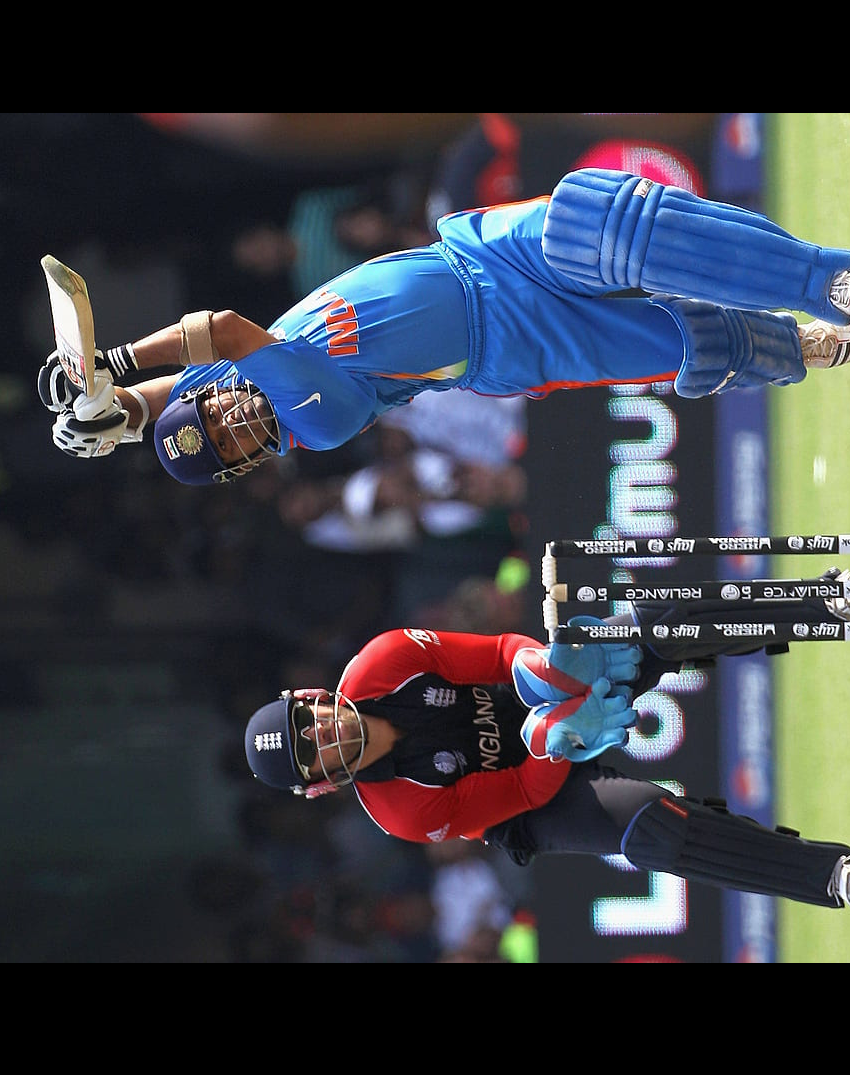

In [29]:
img_pil.rotate(90)

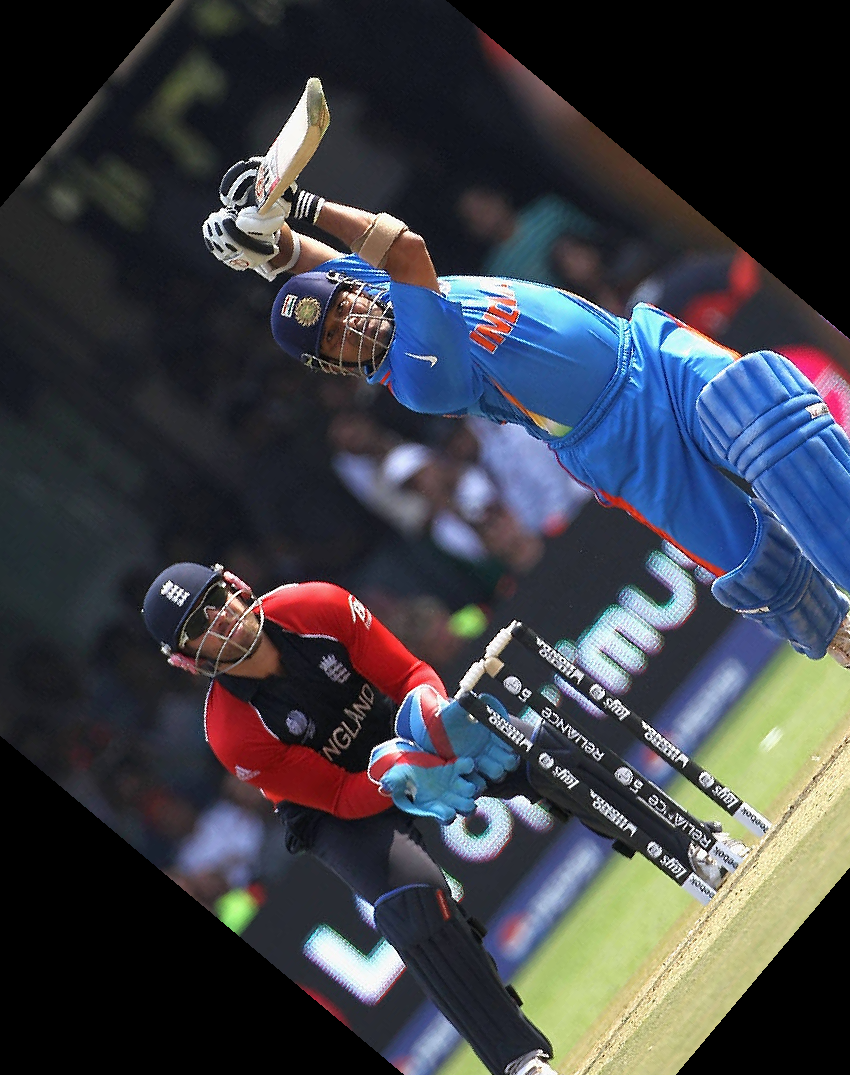

In [30]:
img_pil.rotate(50) 

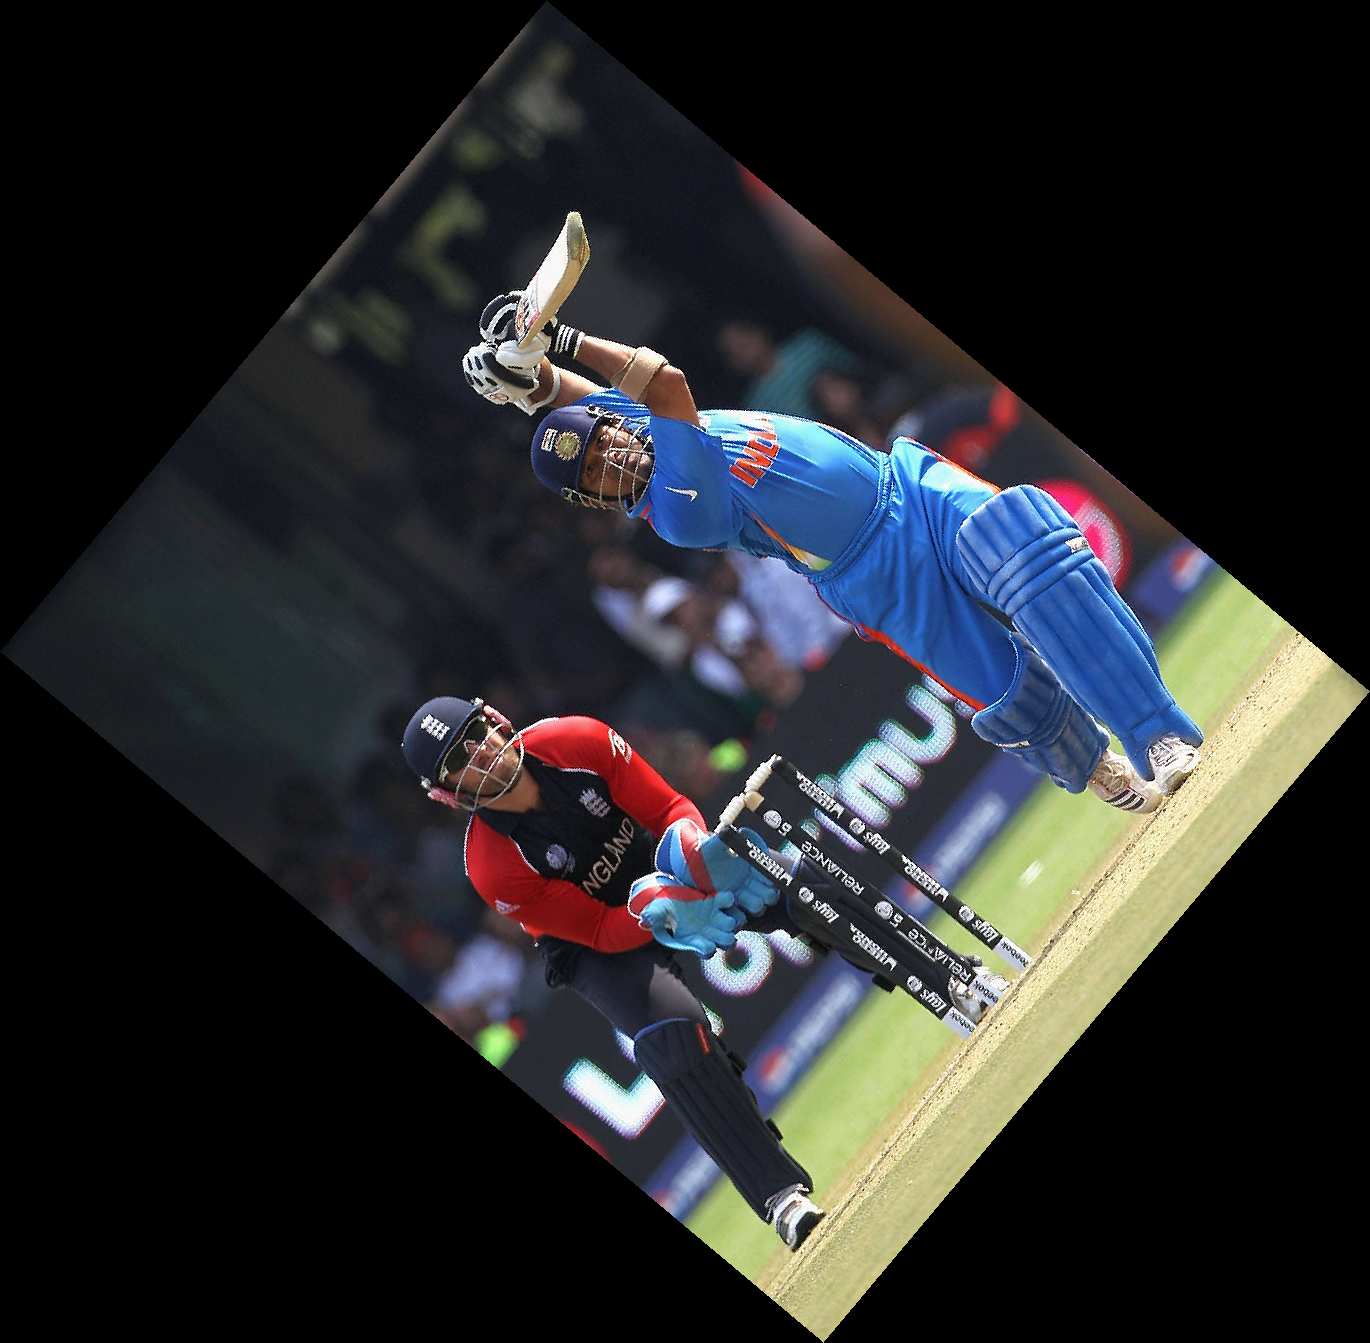

In [31]:
img_pil.rotate(50,expand=True)  # cover into within box by expand

### <b>```5. Image Translation/Shifting```</b>

In [32]:
# get the shape
height, width, _ = img_cv2.shape  # here, _ = color channel

In [33]:
quarter_height, quarter_width = height//4, width//4

In [34]:
T = np.float32([[1,0,quarter_width],[0,1,quarter_height]])
T

array([[  1.,   0., 212.],
       [  0.,   1., 268.]], dtype=float32)

In [35]:
'''
This matrix is typically used for translation in 2D space. Here's a breakdown of the components:

The first row [1, 0, 50] means:

1: No scaling along the x-axis.
0: No rotation (no shearing along the x-axis).
50: Translation of 50 units along the x-axis.
The second row [0, 1, 100] means:

0: No rotation (no shearing along the y-axis).
1: No scaling along the y-axis.
100: Translation of 100 units along the y-axis.
'''

T =  np.float32([[1,0,500],[0,1,100]])  # manual scalling

In [36]:
img_trans = cv2.warpAffine(img_cv2,T,(width,height))

In [37]:
cv2.imshow("Transated Image",img_trans)
cv2.waitKey(0)
cv2.destroyAllWindows()

### <b>```6. Image Shearing```</b>

In [38]:
shear_x = 0.25
shear_y = 0.40

M = np.array([[1,shear_x,0],
              [shear_y,1,0],
              [0,0,1]])

In [39]:
M

array([[1.  , 0.25, 0.  ],
       [0.4 , 1.  , 0.  ],
       [0.  , 0.  , 1.  ]])

In [40]:
img_shear = cv2.warpPerspective(img_cv2, M,(width,height))

In [41]:
cv2.imshow("Shearing Image", img_shear)
cv2.waitKey(0)
cv2.destroyAllWindows()

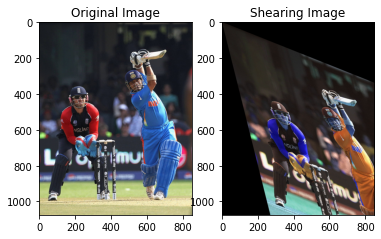

In [42]:
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_rgb);
plt.subplot(1,2,2)
plt.title("Shearing Image")
plt.imshow(img_shear);

### <b>```7. Affine Transformation```</b>

In [43]:
tx = 50      # translation-x
ty = 100     # translation-y
angle = 45   # rotation
scale = 0.8  # scaling Factor
shear_x = 0.25  # tilt on x-axis
shear_y = 0.3   # tilt on y-axis

# define the affine transformation matrix
M = np.float32([[scale*np.cos(np.radians(angle)),shear_x,tx],[shear_y, scale*np.sin(np.radians(angle)),ty]])

In [44]:
M

array([[  0.56568545,   0.25      ,  50.        ],
       [  0.3       ,   0.56568545, 100.        ]], dtype=float32)

In [45]:
img_new = cv2.warpAffine(img_cv2, M, (width,height))

In [46]:
cv2.imshow("Final Image", img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()